In [1]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('../../../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/params_testing/')
from model_files.nerm_pvals import model 
import pandas as pdc
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
# from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
# from pysb.tools.sensitivity_analysis import PairwiseSensitivity
os.environ['OMP_NUM_THREADS'] = '1'
import seaborn as sns
from scipy.optimize import curve_fit
import seaborn as sns

In [ ]:
for i,p in enumerate(model.parameters):
    print(i,p)

In [2]:
m1 = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m11 = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m111 = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
m1111 = np.load('../../params_testing/necro_pars10k_mode1_5720_modcylda20.npy')
# m2 = np.load('../../params_testing/necro_pars10k_mode2_5720_modcylda20.npy')
# m3 = np.load('../../params_testing/necro_pars10k_mode3_5720_modcylda20.npy')
# m4 = np.load('../../params_testing/necro_pars10k_mode4_5720_modcylda20.npy')

In [3]:
m11[:,25] = m11[:,25]*5
m111[:,25] = m111[:,25]*10
m1111[:,25] = m1111[:,25]*15

In [ ]:
print(m1[:,25])
print(m11[:,25])
print(m111[:,25])
print(m1111[:,25])

In [4]:
tspan = np.linspace(0,1800,500)
m = model.components

In [5]:
solverwt0 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(param_values=m1, num_processors = 20)
wtdf = wtclus0.dataframe

2022-01-24 22:18:04.763 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-24 22:18:05.537 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-24 22:18:05.665 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-24 22:18:05.883 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-24 22:22:29.541 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-24 22:22:29.545 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-24 22:22:32.264 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [6]:
thresh = 2772
ttd = []
for j in range(len(m1)):
    i_range = range(len(wtdf.loc[j]['MLKLa_obs']))
    for i in i_range:
        if wtdf.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttd.append(wtdf.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttd.append(np.inf)
for i in range(len(ttd)):
    if ttd[i] == np.inf:
        ttd[i] = 2100  

In [9]:
solvera20 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
a20clus0 = solvera20.run(initials = {m.A20(brip = None):0},
                         param_values=m1, num_processors = 20)
dfa200 = a20clus0.dataframe

2022-01-24 22:28:21.824 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-24 22:28:21.836 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-24 22:28:21.906 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-24 22:28:22.133 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-24 22:32:35.696 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-24 22:32:35.699 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-24 22:32:38.240 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [10]:
thresh = 2772
ttda20 = []
for j in range(len(m1)):
    i_range = range(len(dfa200.loc[j]['MLKLa_obs']))
    for i in i_range:
        if dfa200.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttda20.append(dfa200.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttda20.append(np.inf)
for i in range(len(ttda20)):
    if ttda20[i] == np.inf:
        ttda20[i] = 2100  

In [11]:
solvera201 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
a20clus01 = solvera201.run(initials = {m.A20(brip = None):0},
                         param_values=m11, num_processors = 20)
dfa201 = a20clus01.dataframe

2022-01-24 22:39:36.647 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-24 22:39:36.652 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-24 22:39:36.687 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-24 22:39:36.884 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-24 22:43:46.273 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-24 22:43:46.276 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-24 22:43:48.999 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [12]:
thresh = 2772
ttda201 = []
for j in range(len(m11)):
    i_range = range(len(dfa201.loc[j]['MLKLa_obs']))
    for i in i_range:
        if dfa201.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttda201.append(dfa201.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttda201.append(np.inf)
for i in range(len(ttda201)):
    if ttda201[i] == np.inf:
        ttda201[i] = 2100  

In [13]:
solvera202 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
a20clus02 = solvera202.run(initials = {m.A20(brip = None):0},
                         param_values=m111, num_processors = 20)
dfa202 = a20clus02.dataframe

2022-01-24 22:49:31.268 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-24 22:49:31.274 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-24 22:49:31.310 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-24 22:49:31.506 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-24 22:53:40.680 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-24 22:53:40.682 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-24 22:53:43.310 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [14]:
thresh = 2772
ttda202 = []
for j in range(len(m111)):
#     print(f"this is output line {j}")
    i_range = range(len(dfa202.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if dfa202.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttda202.append(dfa202.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttda202.append(np.inf)
for i in range(len(ttda202)):
    if ttda202[i] == np.inf:
        ttda202[i] = 2100  

In [15]:
solvera203 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
a20clus03 = solvera203.run(initials = {m.A20(brip = None):0},
                         param_values=m1111, num_processors = 20)
dfa203 = a20clus03.dataframe

2022-01-24 22:59:10.697 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-24 22:59:10.703 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-24 22:59:10.739 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-24 22:59:10.936 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes
2022-01-24 23:03:17.682 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-24 23:03:17.684 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-24 23:03:20.381 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


In [16]:
thresh = 2772
ttda203 = []
for j in range(len(m1111)):
#     print(f"this is output line {j}")
    i_range = range(len(dfa203.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if dfa203.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttda203.append(dfa203.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttda203.append(np.inf)
for i in range(len(ttda203)):
    if ttda203[i] == np.inf:
        ttda203[i] = 2100  

In [21]:
import pandas as pd
# dfm232 = pd.melt(dfmode3)
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df2 = pd.DataFrame({'WT': ttd,
                          'A20 KO':  ttda20,
                         'cIAP hOM':  ttda201,
                          'cIAP 1OM':  ttda202,
                        'cIAP 1hOM': ttda203})
dfclus2hr = pd.DataFrame(data = mode1df2,
                        columns = ['WT','A20 KO','cIAP hOM','cIAP 1OM', 'cIAP 1hOM'])

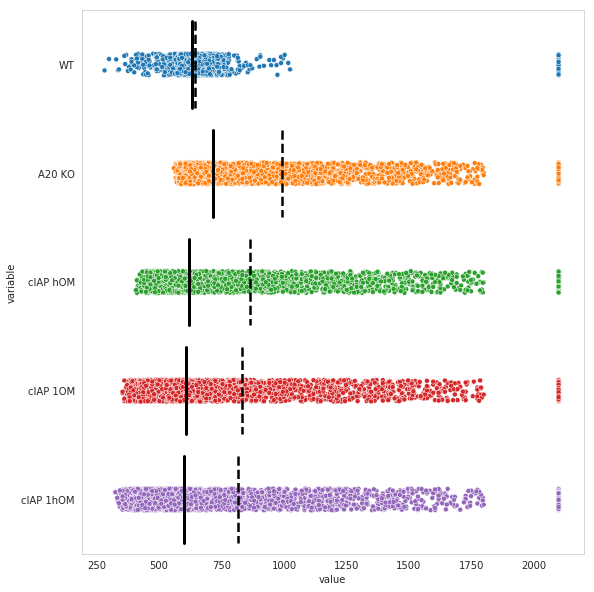

In [22]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,10))
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfclus2hr), marker = 'o',
                  linewidth=0.5,size=5, edgecolor = 'white')
medianprops = dict(linestyle='-', linewidth=3, color='k')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='black')
b = sns.boxplot(showmeans=True,
            meanline=True,
            meanprops = meanlineprops,
            medianprops= medianprops,
            whiskerprops={'visible': False},
            zorder=10,
            x="value",
            y="variable",
            data=pd.melt(dfclus2hr),
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=b)
plt.show()